<a href="https://colab.research.google.com/github/owengenge/cap-comp215/blob/main/Project_1_Plotting_NEO's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project 1:** Plotting Potentially Hazardous Near Earth Objects

Name: Owen Genge

Date: Feb 19, 2023



In [2]:
import datetime, json, requests
from pprint import pprint   
from dataclasses import dataclass
import matplotlib.pyplot as plt


In [35]:
API_KEY = 'DEMO_KEY' 
url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date=2023-02-23&end_date=2023-02-24&api_key={API_KEY}'
response = requests.request("GET", url, headers={}, data={})
data = json.loads(response.text)  # recall json.loads for lab 1


neos = data['near_earth_objects']
dates = neos.keys()
#cad = [item['close_approach_data'] for item in neos]

miss_distances = []
approach_dates = []
  
for date in dates:
  neos = data['near_earth_objects'][date]
  cad = [item['close_approach_data'] for item in neos]
  miss_distances.extend([cad[i][0]['miss_distance']['kilometers'] for i in range(len(neos))
                          if cad[i][0]['orbiting_body'] == 'Earth' 
                           and neos[i]['is_potentially_hazardous_asteroid'] is True])
  approach_dates.extend([cad[i][0]['close_approach_date'] for i in range(len(neos)) 
                          if cad[i][0]['orbiting_body'] == 'Earth'
                           and neos[i]['is_potentially_hazardous_asteroid'] is True])
miss_distances
#approach_dates
#neos
# miss_distnaces = [cad[i][0]['miss_distance']['kilometers'] for i in range(len(neos))]
# approach_dates = [cad[i][0]['close_approach_date'] for i in range(len(neos))]
# approach_dates
# neos
# dates

['16018723.077487435']

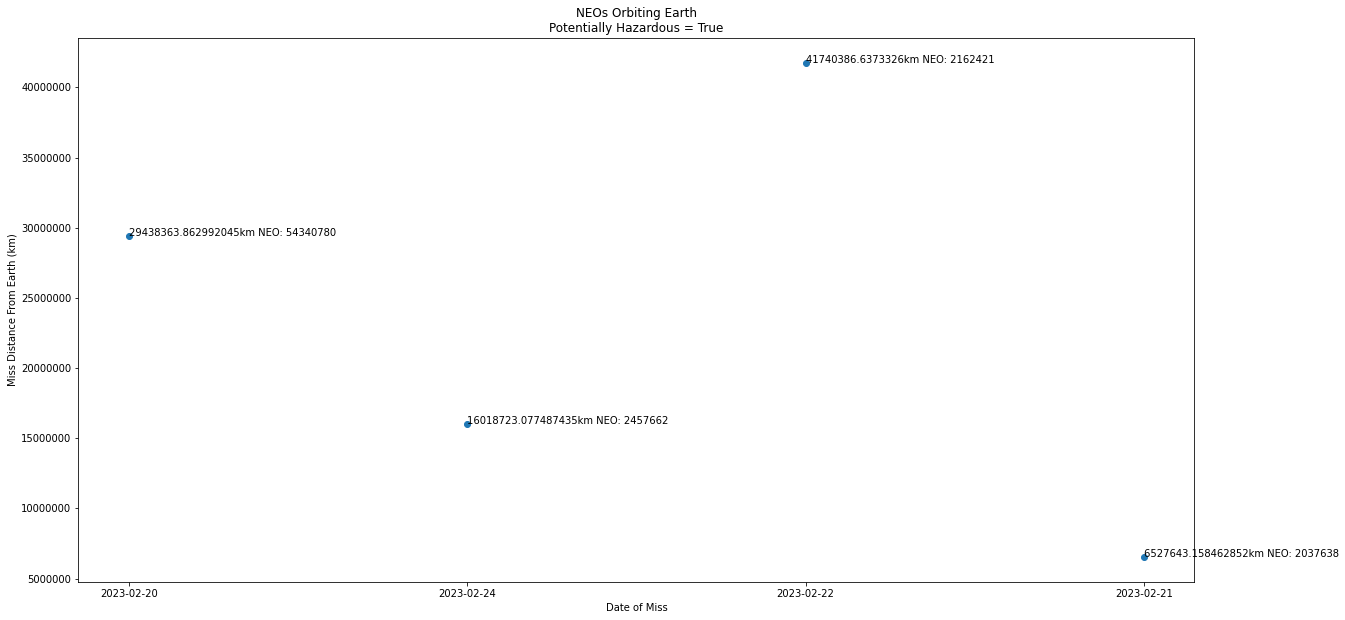

In [56]:
def ast_miss_data(orbiting_body, start_date, end_date, potentially_hazardous):
  ''' Displays a scatter plot of a NEO's distance from earth in a given time series. '''

  API_KEY = 'BQuTOmvJ8rJthGRwxNG8a02iQmcoaXEMxQ0rviXq'  
  url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&end_date={end_date}&api_key={API_KEY}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)  
  #pprint(data)
  neos = data['near_earth_objects']
  
  dates = neos.keys()
  
  miss_distances = []
  approach_dates = []
  IDs = []
  for date in dates:
    neos = data['near_earth_objects'][date]
    cad = [item['close_approach_data'] for item in neos]
    miss_distances.extend([float(cad[i][0]['miss_distance']['kilometers']) for i in range(len(neos))
                          if cad[i][0]['orbiting_body'] == orbiting_body 
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
    approach_dates.extend([cad[i][0]['close_approach_date'] for i in range(len(neos)) 
                          if cad[i][0]['orbiting_body'] == orbiting_body
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
    IDs.extend([neos[i]['id'] for i in range(len(neos)) if cad[i][0]['orbiting_body'] == orbiting_body
                           and neos[i]['is_potentially_hazardous_asteroid'] is potentially_hazardous])
  #print(IDs)
  plt.rcParams["figure.figsize"] = (20,10)#(len(approach_dates)*2, len(miss_distances))
  plt.title(f'NEOs Orbiting {orbiting_body}\nPotentially Hazardous = {potentially_hazardous}')
  plt.ylabel('Miss Distance From Earth (km)')
  plt.xlabel('Date of Miss')
  plt.ticklabel_format(style='plain')
  
  plt.scatter(approach_dates, miss_distances)
  # for i, txt in enumerate(miss_distances):
  #   plt.annotate(txt, (approach_dates[i], miss_distances[i]))
  for i in range(len(IDs)):
    plt.annotate((f'{miss_distances[i]}km NEO: {IDs[i]}'),(approach_dates[i],miss_distances[i]))
  plt.show

  
today = str(datetime.date.today())

ast_miss_data(orbiting_body='Earth', start_date='2023-02-20', end_date=today, potentially_hazardous=True)




